In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import numpy as np

2025-09-23 02:36:14.532797: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-23 02:36:14.539931: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758575174.549042   23081 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758575174.551732   23081 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758575174.558264   23081 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [5]:

# 2. Define the Neural Network Architecture
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    return model



In [6]:

# 3. List of Optimizers to Compare
optimizers = {
    'SGD': keras.optimizers.SGD(),
    'SGD with Momentum': keras.optimizers.SGD(momentum=0.9),
    'Adagrad': keras.optimizers.Adagrad(),
    'RMSProp': keras.optimizers.RMSprop(),
    'AdaDelta': keras.optimizers.Adadelta(),
    'Adam': keras.optimizers.Adam(),
}



I0000 00:00:1758575176.208290   23081 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9351 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
# Dictionary to store the history of each optimizer
history_dict = {}

# 4. Train the model with each optimizer
EPOCHS = 10
BATCH_SIZE = 128



In [ ]:
for name, optimizer in optimizers.items():
    print(f"\n--- Training with {name} ---")
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=(x_test, y_test),
                        verbose=0) # Set to 1 to see epoch-by-epoch progress
    
    history_dict[name] = history
    
    # Evaluate and print final accuracy
    score = model.evaluate(x_test, y_test, verbose=0)
    print(f"Optimizer: {name}, Test Loss: {score[0]:.4f}, Test Accuracy: {score[1]:.4f}")




--- Training with SGD ---


/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/.conda/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1758575176.850476   23247 service.cc:152] XLA service 0x7f0164005450 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758575176.850488   23247 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2025-09-23 02:36:16.857740: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1758575176.877219   23247 cuda_dnn.cc:529] Loaded cuDNN version 91300
2025-09-23 02:36:17.981693: I external/local_xla/xla/stream_executor/cuda/subprocess_comp

Optimizer: SGD, Test Loss: 0.2729, Test Accuracy: 0.9250

--- Training with SGD with Momentum ---
Optimizer: SGD with Momentum, Test Loss: 0.0993, Test Accuracy: 0.9714

--- Training with Adagrad ---


2025-09-23 02:36:33.695249: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_548', 24 bytes spill stores, 24 bytes spill loads



Optimizer: Adagrad, Test Loss: 0.4523, Test Accuracy: 0.8917

--- Training with RMSProp ---


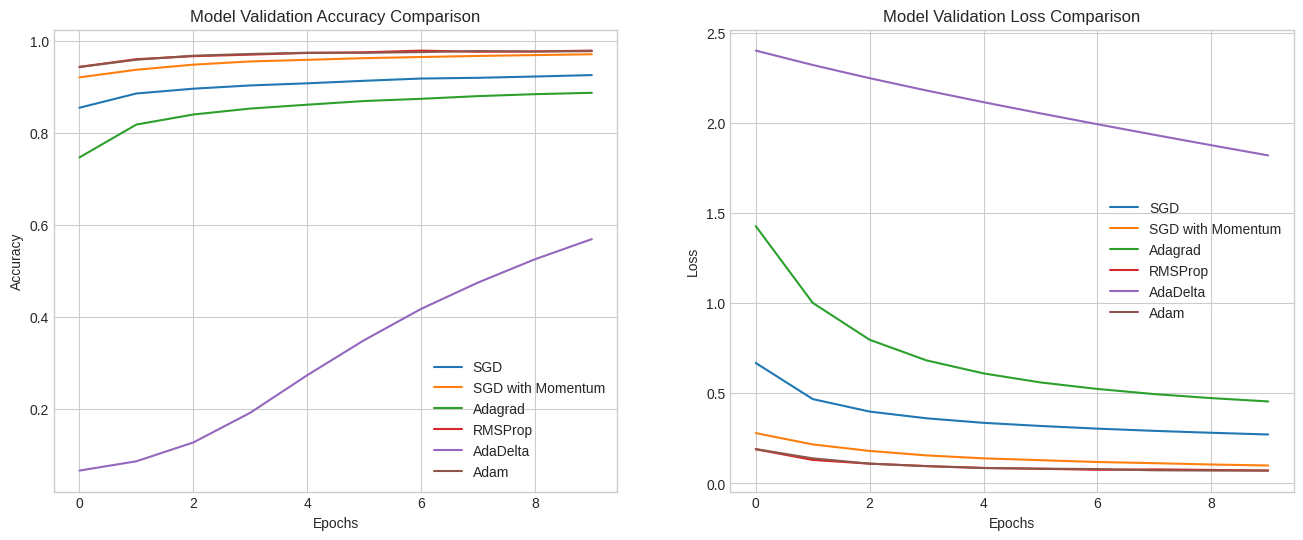

In [ ]:

# 5. Plot and Compare Results
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for name, history in history_dict.items():
    ax1.plot(history.history['val_accuracy'], label=name)
ax1.set_title('Model Validation Accuracy Comparison')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

for name, history in history_dict.items():
    ax2.plot(history.history['val_loss'], label=name)
ax2.set_title('Model Validation Loss Comparison')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()